In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import davies_bouldin_score

import warnings
from tqdm import tqdm
from sklearn.manifold import trustworthiness
warnings.filterwarnings("ignore")

In [2]:
# adopted from https://github.com/jqmviegas/jqm_cvi/blob/master/jqmcvi/base.py#L72

def delta_fast(ck, cl, distances):
    values = distances[np.where(ck)][:, np.where(cl)]
    values = values[np.nonzero(values)]

    return np.min(values)
    
def big_delta_fast(ci, distances):
    values = distances[np.where(ci)][:, np.where(ci)]
    #values = values[np.nonzero(values)]
            
    return np.max(values)

def dunn_fast(points, labels):
    """ Dunn index - FAST (using sklearn pairwise euclidean_distance function)
    
    Parameters
    ----------
    points : np.array
        np.array([N, p]) of all points
    labels: np.array
        np.array([N]) labels of all points
    """
    distances = euclidean_distances(points)
    ks = np.sort(np.unique(labels))
    
    deltas = np.ones([len(ks), len(ks)])*1000000
    big_deltas = np.zeros([len(ks), 1])
    
    l_range = list(range(0, len(ks)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta_fast((labels == ks[k]), (labels == ks[l]), distances)
        
        big_deltas[k] = big_delta_fast((labels == ks[k]), distances)

    di = np.min(deltas)/np.max(big_deltas)
    return di

## Start exploring

In [3]:
n_samples = 1000
dim = 32

n_centers = 10
n_samples_around_c = 100

In [16]:
def make_embeddings_and_labels(std):
    cluster_centers = np.random.uniform(0,1,size=(n_centers, dim))
    latent_emb = []
    labels = []

    # create data
    for ci, c in enumerate(cluster_centers):
        samples = np.random.normal(c, std, size=(n_samples_around_c, dim))
        latent_emb.append(samples)
        labels.append(np.ones(len(samples))*ci)

    latent_emb = np.array(latent_emb).reshape(n_centers*n_samples_around_c, -1)
    labels = np.array(labels).reshape(n_centers*n_samples_around_c, -1)
    return latent_emb, labels

In [17]:
def test_kmean_and_metrics(latent_emb):
    res = {}
    res['db'] = {}
    res['dunn'] = {}
    for k in range(2, 21):
        KMean= KMeans(n_clusters=2)
        label = KMean.fit_predict(latent_emb)
        res['db'][k] = davies_bouldin_score(latent_emb, label)
        res['dunn'][k] = dunn_fast(latent_emb, label)
        print(f'Dunn Index(n={k}) \u2191: { res["dunn"][k]}')
        print(f'Davies–Bouldin Index(n={k}) \u2193: {res["db"][k]}')
    return res

## Std= 0.01  

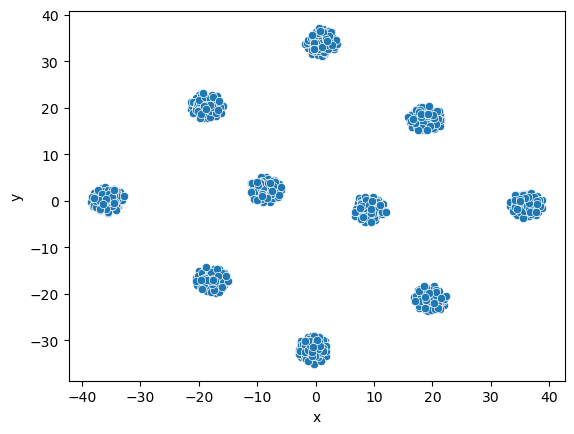

In [18]:
latent_emb, labels = make_embeddings_and_labels(0.01)
clustering = pd.DataFrame(TSNE(n_components=2, perplexity=30).fit_transform(latent_emb), columns=['x', 'y'])
sns.scatterplot(data=clustering, x='x', y='y')
plt.show()

In [ ]:
res_0_01 = test_kmean_and_metrics(latent_emb)

## Std= 0.1 

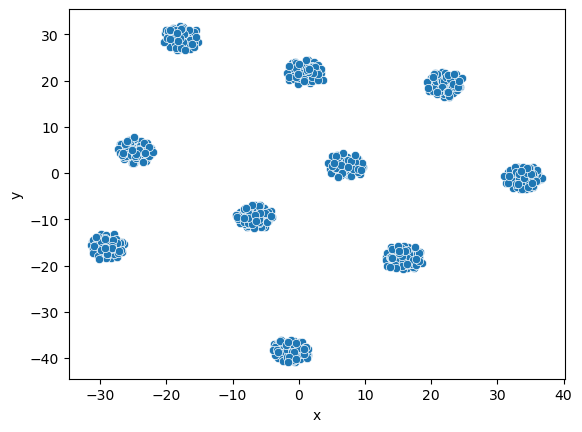

In [20]:
latent_emb, labels = make_embeddings_and_labels(0.1)
clustering = pd.DataFrame(TSNE(n_components=2, perplexity=30).fit_transform(latent_emb), columns=['x', 'y'])
sns.scatterplot(data=clustering, x='x', y='y')
plt.show()

In [ ]:
res_0_1 = test_kmean_and_metrics(latent_emb)

## Std= 0.3

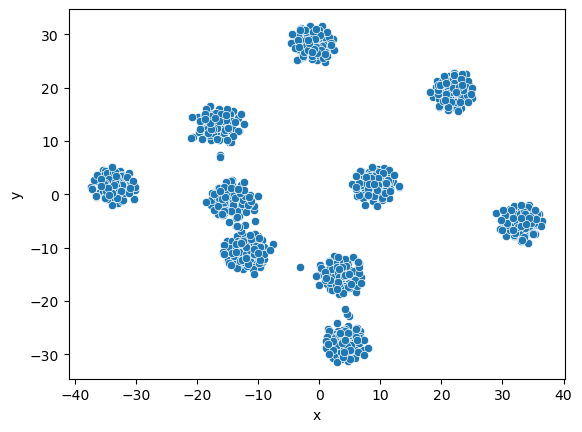

In [22]:
latent_emb, labels = make_embeddings_and_labels(0.3)
clustering = pd.DataFrame(TSNE(n_components=2, perplexity=30).fit_transform(latent_emb), columns=['x', 'y'])
sns.scatterplot(data=clustering, x='x', y='y')
plt.show()

In [ ]:
res_0_3 = test_kmean_and_metrics(latent_emb)

## Std= 0.4

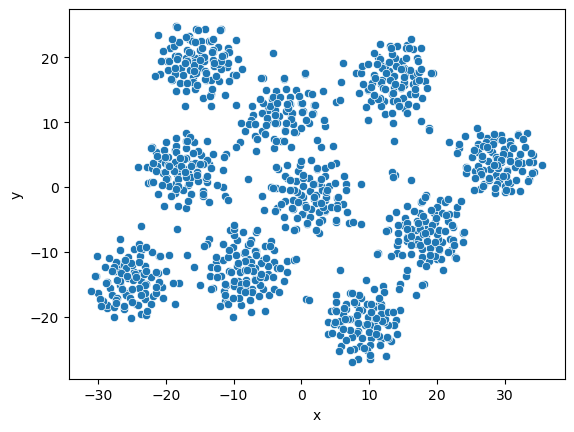

In [24]:
latent_emb, labels = make_embeddings_and_labels(0.4)
clustering = pd.DataFrame(TSNE(n_components=2, perplexity=30).fit_transform(latent_emb), columns=['x', 'y'])
sns.scatterplot(data=clustering, x='x', y='y')
plt.show()

In [ ]:
res_0_4 = test_kmean_and_metrics(latent_emb)

## Std= 0.5

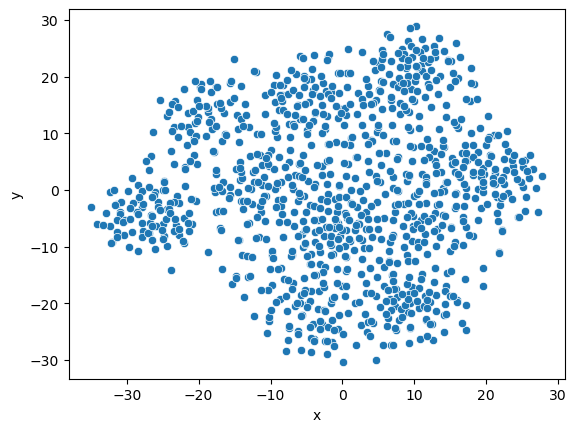

In [26]:
latent_emb, labels = make_embeddings_and_labels(0.5)
clustering = pd.DataFrame(TSNE(n_components=2, perplexity=30).fit_transform(latent_emb), columns=['x', 'y'])
sns.scatterplot(data=clustering, x='x', y='y')
plt.show()

In [ ]:
res_0_5 = test_kmean_and_metrics(latent_emb)

## Plot progress 

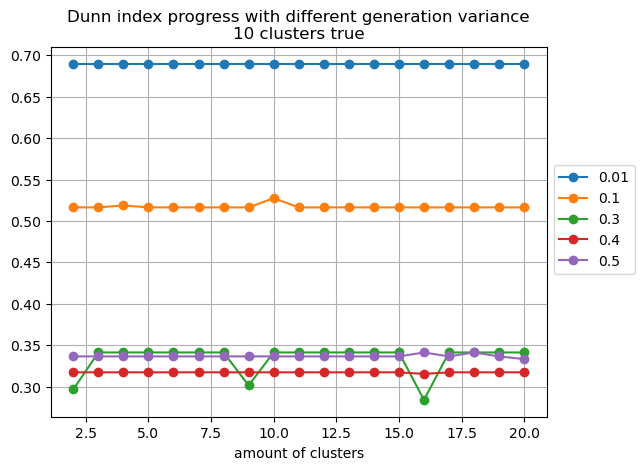

In [44]:
plt.plot(res_0_01['dunn'].keys(), res_0_01['dunn'].values(), '-o', label= '0.01')
plt.plot(res_0_1['dunn'].keys(), res_0_1['dunn'].values(), '-o', label= '0.1')
plt.plot(res_0_3['dunn'].keys(), res_0_3['dunn'].values(), '-o', label= '0.3')
plt.plot(res_0_4['dunn'].keys(), res_0_4['dunn'].values(), '-o', label= '0.4')
plt.plot(res_0_5['dunn'].keys(), res_0_5['dunn'].values(), '-o', label= '0.5')
plt.legend(bbox_to_anchor=(1, 0.7))
plt.xlabel('amount of clusters')
plt.title('Dunn index progress with different generation variance\n10 clusters true')
plt.grid()

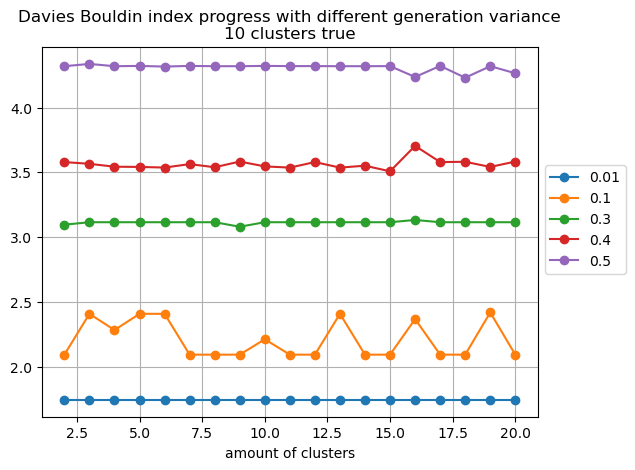

In [43]:
plt.plot(res_0_01['db'].keys(), res_0_01['db'].values(), '-o', label= '0.01')
plt.plot(res_0_1['db'].keys(), res_0_1['db'].values(), '-o', label= '0.1')
plt.plot(res_0_3['db'].keys(), res_0_3['db'].values(), '-o', label= '0.3')
plt.plot(res_0_4['db'].keys(), res_0_4['db'].values(), '-o', label= '0.4')
plt.plot(res_0_5['db'].keys(), res_0_5['db'].values(), '-o', label= '0.5')
plt.legend(bbox_to_anchor=(1, 0.7))
plt.xlabel('amount of clusters')
plt.title('Davies Bouldin index progress with different generation variance\n10 clusters true')
plt.grid()

## Conclusion: 
Both indexes seems to work bad in 2 dimensions with all levels of noise